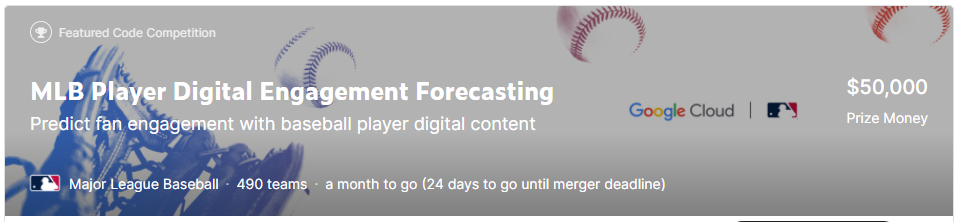

thanks https://www.kaggle.com/mlconsult/1-35-lightgbm-ann credit to @KenMiller

> 📌プレーヤーがサヨナラホームランを打つ。投手はノーヒットノーランを投げます。チームはポストシーズンに入ると真っ赤になります。私たちは野球ファンの関心を高めるいくつかの触媒を知っています。現在、メジャーリーグベースボール（MLB）とGoogle Cloudは、Kaggleコミュニティの支援により、サポーターの関与を刺激し、プレーヤーとファンの間に深い関係を築く他の多くの要因を特定することを望んでいます。
> 
> このスポーツには、数字主導の長い歴史があります。少なくとも4月から10月までのほぼ毎日、野球ファンは選手に関する情報を見て、読んで、検索しています。どの個人を探すかは、プレーヤーのパフォーマンス、チームの順位、人気など、現在不明な要因によって異なります。これは、データサイエンスのおかげでよりよく理解できます。
> 
> 少なくとも1990年代初頭以来、MLBはデータの使用においてスポーツ界をリードし、データと人間のパフォーマンスを組み合わせたときに何が可能かをファン、プレーヤー、コーチ、メディアに示してきました。 MLBは、テクノロジーを使用してリーダーシップを継続し、ファンを引き付け、新しいファンにアメリカのお気に入りの娯楽を体験する革新的な方法を提供します。
> 
> 
> 
> MLBはGoogleCloudと提携して、データを通じてファンの体験を変革しました。 Google Cloudは、Vertex AIの立ち上げを祝うこのKaggleコンテストを誇らしげにサポートしています。これは、MLワークフローを統合するGoogleCloudの新しいプラットフォームです。
> 
> このコンテストでは、ファンがMLBプレーヤーのデジタルコンテンツを将来の日付範囲で毎日どのように利用するかを予測します。プレーヤーのパフォーマンスデータ、ソーシャルメディアデータ、市場規模などのチーム要因にアクセスできます。成功したモデルは、どのシグナルがエンゲージメントと最も強く相関し、影響を与えるかについての新しい洞察を提供します。
> 
> MLBオールスターラウンドをシーズンを通して予測できるかどうか、またはチームの25人のプレーヤーのそれぞれが脚光を浴びているときを想像してみてください。これらの洞察は、アメリカの娯楽のファンダムを深く掘り下げるときに可能になります。この種の最初の方法の一部として、プレーヤーレベルでのデジタルエンゲージメントをこのきめ細かい日常的な方法で理解しようとします。同時に、Google Cloudのデータ分析、Vertex AI、MLOpsツールを使用して、MLBがイノベーションをより簡単に構築できるように支援します。 MLBファンとプレーヤーのエンゲージメントの未来を形作る上で役割を果たすことができます。

> 📌あなたは、2021年シーズンに活躍するMLBプレーヤーのサブセットについて、4つの異なるエンゲージメントの測定値（target1-target4）を予測する必要があります。データには、時間の経過とともに変化しない一連の静的ファイル（players.csv、teams.csv、seasons.csv、awards.csv）と、日ごとにグループ化された日次データ（train.csv）が含まれています。特定の日付を予測する場合、次の日のターゲット変数を予測します（つまり、日付dの場合、日d + 1のエンゲージメントを予測します）。
> 
> これは、時系列モジュールに依存してモデルが時間的に前向きにならないようにするコード競争です。時系列モジュールは、テストデータを提供し、送信ファイルを自動的に書き込みます。テストデータは、ターゲット値が含まれていないことを除いて、train.csvと同じ形式のデータフレームで到着します。提出するには、評価ページの指示に従ってください。ノートブックを送信すると、表示されていないテストセットで再実行されます。
> 
> コンテストのトレーニングフェーズでは、この目に見えないテストセットは、2021年5月の月のデータと今年のアクティブなプレーヤーのセットで構成されます。
> 評価フェーズでは、テストセットは約1か月の将来のシーズン範囲になります。
> コードは堅牢で、モジュールによって要求されたdate_playerIdの組み合わせを予測する必要があります。各チームが選択したノートブック（チームごとに最大2つ、最終提出期限までに選択）は、評価フェーズ中に再実行されます。
> 
> 詳細に飛び込む前に、データに関するいくつかの高レベルの資格：
> 
> 一部の自明のフィールドには説明がありません（例：季節）
> バイナリ列には、ゼロだけでなくNULL値も含まれます。プレイヤーが何かをする機会があったが、しなかった場合、ゼロが発生します。プレーヤーが何かをする機会がなかった場合、ヌルが発生します（たとえば、特定の日にピッチングしないプレーヤーは完封をピッチングできない可能性があるため、ヌル値が予想されます）
> ほとんどのゲーム状態関連フィールド（ボール、ストライク、アウトなど）は、問題のイベント後のゲーム状態を表します。ただし、ホームスコアとアウェイスコアは、イベント前のスコアを表します。

In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/competiongoal/archive/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert"><font color="black">
⚾ <b>Competition Goal</b>:あなたは、2021年シーズンに活躍するMLBプレーヤーのサブセットについて、4つの異なるエンゲージメントの測定値（target1-target4）を予測する必要があります
</div>

In [ ]:

"""
!pip install pandarallel 

import gc

import numpy as np
import pandas a
from pathlib import Path

from pandarallel import pandarallel
pandarallel.initialize()

BASE_DIR = Path('../input/mlb-player-digital-engagement-forecasting')
train = pd.read_csv(BASE_DIR / 'train.csv')

null = np.nan
true = True
false = False

for col in train.columns
    if col == 'date': continue

    _index = train[col].notnull()
    train.loc[_index, col] = train.loc[_index, col].parallel_apply(lambda x: eval(x))

    outputs = []
    for index, date, record in train.loc[_index, ['date', col]].itertuples():
        _df = pd.DataFrame(record)
        _df['index'] = index
        _df['date'] = date
        outputs.append(_df)

    outputs = pd.concat(outputs).reset_index(drop=True)

    outputs.to_csv(f'{col}_train.csv', index=False)
    outputs.to_pickle(f'{col}_train.pkl')

    del outputs
    del train[col]
    gc.collect()
"""

## Training

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import mean_absolute_error
from datetime import timedelta
from functools import reduce
from tqdm import tqdm
import lightgbm as lgbm
import mlb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
BASE_DIR = Path('../input/mlb-player-digital-engagement-forecasting')
TRAIN_DIR = Path('../input/mlbdata') #../input/mlb-pdef-train-dataset')

In [ ]:
players = pd.read_csv(BASE_DIR / 'players.csv')

rosters = pd.read_pickle(TRAIN_DIR / 'rosters_train.pkl')
targets = pd.read_pickle(TRAIN_DIR / 'nextDayPlayerEngagement_train.pkl')
scores = pd.read_pickle(TRAIN_DIR / 'playerBoxScores_train.pkl')
scores = scores.groupby(['playerId', 'date']).sum().reset_index()
#scores = pd.read_csv(TRAIN_DIR/ 'playerBoxScores_train.csv')

In [ ]:
targets_cols = ['playerId', 'target1', 'target2', 'target3', 'target4', 'date']
players_cols = ['playerId', 'primaryPositionName']
rosters_cols = ['playerId', 'teamId', 'status', 'date']
scores_cols = ['playerId', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching', ###
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves','holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances', 'date']

feature_cols = ['label_playerId', 'label_primaryPositionName', 'label_teamId',
       'label_status', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs','gamesPlayedPitching', 'gamesStartedPitching', 
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',###
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen',  'wildPitches', 'pickoffsPitching','balks',#@
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances','target1_mean',
 'target1_median',
 'target1_std',
 'target1_min',
 'target1_max',
 'target1_prob',
 'target2_mean',
 'target2_median',
 'target2_std',
 'target2_min',
 'target2_max',
 'target2_prob',
 'target3_mean',
 'target3_median',
 'target3_std',
 'target3_min',
 'target3_max',
 'target3_prob',
 'target4_mean',
 'target4_median',
 'target4_std',
 'target4_min',
 'target4_max',
 'target4_prob']

feature_cols2 = ['label_playerId', 'label_primaryPositionName', 'label_teamId',
       'label_status', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
        'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
        'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',###
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'wildPitches', 'pickoffsPitching','balks', #@
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances','target1_mean',
 'target1_median',
 'target1_std',
 'target1_min',
 'target1_max',
 'target1_prob',
 'target2_mean',
 'target2_median',
 'target2_std',
 'target2_min',
 'target2_max',
 'target2_prob',
 'target3_mean',
 'target3_median',
 'target3_std',
 'target3_min',
 'target3_max',
 'target3_prob',
 'target4_mean',
 'target4_median',
 'target4_std',
 'target4_min',
 'target4_max',
 'target4_prob',
    'target1']

In [ ]:
player_target_stats = pd.read_csv("../input/mlbdata/player_target_stats.csv")
#player_target_stats = player_target_stats.drop(['Unnamed: 0'],axis=1)
data_names=player_target_stats.columns.values.tolist()
#data_names

In [ ]:
# creat dataset
train = targets[targets_cols].merge(players[players_cols], on=['playerId'], how='left')
train = train.merge(rosters[rosters_cols], on=['playerId', 'date'], how='left')
train = train.merge(scores[scores_cols], on=['playerId', 'date'], how='left')
train = train.merge(player_target_stats, how='inner', left_on=["playerId"],right_on=["playerId"])


# label encoding
player2num = {c: i for i, c in enumerate(train['playerId'].unique())}
position2num = {c: i for i, c in enumerate(train['primaryPositionName'].unique())}
teamid2num = {c: i for i, c in enumerate(train['teamId'].unique())}
status2num = {c: i for i, c in enumerate(train['status'].unique())}
train['label_playerId'] = train['playerId'].map(player2num)
train['label_primaryPositionName'] = train['primaryPositionName'].map(position2num)
train['label_teamId'] = train['teamId'].map(teamid2num)
train['label_status'] = train['status'].map(status2num)

### 追加説明関数

In [ ]:
#train['add1'] =train['target1_mean'].shift(1) - train['target1_mean'].shift(-1)
#train['add1'] =train['target1_mean'].rolling(5, min_periods=1).mean()
#train['add1'] = train['homeRuns'] * train['hits']
#feature_cols.append('add1')

### 日付いじるとスコアかわりますよ。

In [ ]:
train_X = train[feature_cols]
train_y = train[['target1', 'target2', 'target3', 'target4']]

_index = (train['date'] < 20210426) 
x_train1 = train_X.loc[_index].reset_index(drop=True)
y_train1 = train_y.loc[_index].reset_index(drop=True)
x_valid1 = train_X.loc[~_index].reset_index(drop=True)
y_valid1 = train_y.loc[~_index].reset_index(drop=True)

In [ ]:
train_X = train[feature_cols2]
train_y = train[['target1', 'target2', 'target3', 'target4']]

_index = (train['date'] < 20210426) 
x_train2 = train_X.loc[_index].reset_index(drop=True)
y_train2 = train_y.loc[_index].reset_index(drop=True)
x_valid2 = train_X.loc[~_index].reset_index(drop=True)
y_valid2 = train_y.loc[~_index].reset_index(drop=True)

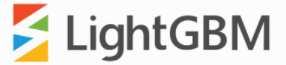

In [ ]:
def fit_lgbm(x_train, y_train, x_valid, y_valid, params: dict=None, verbose=100):
    oof_pred = np.zeros(len(y_valid), dtype=np.float32)
    model = lgbm.LGBMRegressor(**params)
    model.fit(x_train, y_train, 
        eval_set=[(x_valid, y_valid)],  
        early_stopping_rounds=verbose, 
        verbose=verbose)
    oof_pred = model.predict(x_valid)
    score = mean_absolute_error(oof_pred, y_valid)
    print('mae:', score)
    return oof_pred, model, score



# 残る唯一のチューニングポイント　@

In [ ]:
params1 = {'objective':'mae','reg_alpha': 0.14947461820098767, 'random_state':77,'reg_lambda': 0.08, 'n_estimators': 3633, 'learning_rate': 0.1, 'num_leaves': 660, 'feature_fraction': 0.9101240539122566, 'bagging_fraction': 0.9884451442950513, 'bagging_freq': 8, 'min_child_samples': 51}

<pre>params1 = {'objective':'mae','reg_alpha': 0.14947461820098767, 'random_state':77,'reg_lambda': 0.10185644384043743, 'n_estimators': 3633, 'learning_rate': 0.08046301304430488, 'num_leaves': 674, 'feature_fraction': 0.9101240539122566, 'bagging_fraction': 0.9884451442950513, 'bagging_freq': 8, 'min_child_samples': 51} 
0.5770630841609712

num_leaves': 660  0.578658
learning_rate': 0.1 0.578658
reg_alpha': 0.14947461820098767 #
reg_lambda': 0.085  0.578275
feature_fraction: 0.9101240539122566 #
bagging_fraction': 0.9884451442950513 #
bagging_freq': 8 #
min_child_samples': 51 #


In [ ]:
oof1, model1, score1 = fit_lgbm(
    x_train1, y_train1['target1'],
    x_valid1, y_valid1['target1'],
    params1
 )
score1

mae: 0.5765479264820539
0.5765479264820539

## XGBRegressor

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold
xgb_params = {
    'booster':'gbtree',
    'n_estimators':200,
    'max_depth':40, #6
    'eta':0.01,
    'gamma':2.8,
    'objective':'reg:squarederror',
    'verbosity':1,
    'subsample':0.85,
    'colsample_bytree':0.45,
    'lambda':5,
    'scale_pos_weight':1,
    'objective':'reg:squarederror',
    'eval_metric':'rmse'
}

model11 = XGBRegressor(**xgb_params)
model11.fit(x_train1, y_train1['target1'], eval_set = [(x_valid1, y_valid1['target1'])], early_stopping_rounds = 50)

y_pred = model11.predict(x_valid1)

score11 = mean_absolute_error(y_valid1['target1'], y_pred)
score11

1.0764579770208662

In [ ]:
params2 = {
 'objective':'mae',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1, 
 'n_estimators': 1000,#80
 'learning_rate': 0.05,
 'random_state': 77,#42
 "num_leaves": 155
}

In [ ]:
oof2, model2, score2 = fit_lgbm(
    x_train2, y_train2['target2'],
    x_valid2, y_valid2['target2'],
    params2
)
score2

1.1568237368972796

<pre>params2 = { 'objective':'mae', 'reg_alpha': 0.1, 'reg_lambda': 0.1,  'n_estimators': 160,#80 'learning_rate': 0.05,#0.1 'random_state': 77,#42 "num_leaves": 22 1.180154592803244
n_estimators': 1000 1.1645554527856938
num_leaves:155 :1.1568237368972796
reg_alpha': 0.1 #
reg_lambda': 0.1 

In [ ]:
params3 = {
 'objective':'mae',
 'reg_alpha': 0.1,
 'reg_lambda': 0.09, 
 'n_estimators': 10000,
 'learning_rate': 0.05,
 'random_state': 77,#42
 "num_leaves": 800
}


In [ ]:
oof3, model3, score3 = fit_lgbm(
    x_train2, y_train2['target3'],
    x_valid2, y_valid2['target3'],
   params3
)
score3

<pre>params = { 'objective':'mae', 'reg_alpha': 0.1, 'reg_lambda': 0.1,  'n_estimators': 10000, 'learning_rate': 0.1, 'random_state': 77,#42 "num_leaves": 100} 0.4678867373414343
num_leaves:800 0.4620618661241774
learning_rate 0.05 0.4615044085912404
reg_alpha': 0.1 #
reg_lambda': 0.09 0.4615044085912404

0.46137044709334585

In [ ]:
params4 = {'objective':'mae','reg_alpha': 0.016468100279441976, 'random_state':77,'reg_lambda': 0.09128335764019105, 'n_estimators': 9868, 'learning_rate': 0.10528150510326864, 'num_leaves': 1250, 'feature_fraction': 0.4, 'bagging_fraction': 0.3, 'bagging_freq': 19, 'min_child_samples': 71}

In [ ]:
oof4, model4, score4 = fit_lgbm(
    x_train2, y_train2['target4'],
    x_valid2, y_valid2['target4'],
    params4
)
score4

<pre>params4 = {'objective':'mae','reg_alpha': 0.016468100279441976, 'random_state':77,'reg_lambda': 0.09128335764019105, 'n_estimators': 9868, 'learning_rate': 0.10528150510326864, 'num_leaves': 157, 'feature_fraction': 0.5419185713426886, 'bagging_fraction': 0.2637405128936662, 'bagging_freq': 19, 'min_child_samples': 71} 0.9897448589181667
'num_leaves': 1250 0.9278848020973461
]reg_alpha': 0.016468100279441976 #
reg_lambda': 0.09128335764019105 #
feature_fraction': 0.4 0.9269202636946671
bagging_fraction': 0.3 #
bagging_freq': 19 #
min_child_samples': 71#
learning_rate': 0.10528150510326864 #

0.9282364499246017

In [ ]:
score =(score1+score2+score3+score4) / 4
print(f'score: {score}')

<pre>
score: 0.781819183401393

In [ ]:
score =(score2+score3+score4) / 3
print(f'score: {score}')

score: 0.8488102113050756

model12 = XGBRegressor(**xgb_params)
model12.fit(x_train2, y_train2['target2'], eval_set = [(x_valid2, y_valid2['target2'])], early_stopping_rounds = 50)

y_pred = model12.predict(x_valid2)

score12 = mean_absolute_error(y_valid2['target2'], y_pred)
score12

1.5158150124891132

In [ ]:
import sys
print("{}{:>25}{}{:>10}{}".format('|','Variable Name','|','memory','|'))
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000:
        print("{}{:>25}{}{:>10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

model13 = XGBRegressor(**xgb_params)
model13.fit(x_train2, y_train2['target3'], eval_set = [(x_valid2, y_valid2['target3'])], early_stopping_rounds = 50)

y_pred = model13.predict(x_valid2)

score13 = mean_absolute_error(y_valid2['target3'], y_pred)
score13

0.8326967548738722

model14 = XGBRegressor(**xgb_params)
model14.fit(x_train2, y_train2['target4'], eval_set = [(x_valid2, y_valid2['target4'])], early_stopping_rounds = 50)

y_pred = model14.predict(x_valid2)

score14 = mean_absolute_error(y_valid2['target4'], y_pred)
score14

1.2992890471976417

train_X = train[feature_cols]
train_y = train[['target1', 'target2', 'target3', 'target4']]

_index = (train['date'] < 20210426)#0426 
x_train1 = train_X.loc[_index].reset_index(drop=True)
y_train1 = train_y.loc[_index].reset_index(drop=True)
x_valid1 = train_X.loc[~_index].reset_index(drop=True)
y_valid1 = train_y.loc[~_index].reset_index(drop=True)

## Inference

In [ ]:
players_cols = ['playerId', 'primaryPositionName']
rosters_cols = ['playerId', 'teamId', 'status']
scores_cols = ['playerId', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',###
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances']

null = np.nan
true = True
false = False

In [ ]:
del train
del train_X
del train_y
del x_train1

In [ ]:
#メモリ使用状況
import sys
print("{}{:>25}{}{:>10}{}".format('|','Variable Name','|','memory','|'))
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000:
        print("{}{:>25}{}{:>10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from tqdm import tqdm
import gc
from functools import reduce
from sklearn.model_selection import StratifiedKFold

ROOT_DIR = "../input/mlb-player-digital-engagement-forecasting"

#=======================#
def flatten(df, col):
    du = (df.pivot(index="playerId", columns="EvalDate", 
               values=col).add_prefix(f"{col}_").
      rename_axis(None, axis=1).reset_index())
    return du
#============================#
def reducer(left, right):
    return left.merge(right, on="playerId")
#========================

TGTCOLS = ["target1","target2","target3","target4"]
def train_lag(df, lag=1):
    dp = df[["playerId","EvalDate"]+TGTCOLS].copy()
    dp["EvalDate"]  =dp["EvalDate"] + timedelta(days=lag) 
    df = df.merge(dp, on=["playerId", "EvalDate"], suffixes=["",f"_{lag}"], how="left")
    return df
#=================================
def test_lag(sub):
    sub["playerId"] = sub["date_playerId"].apply(lambda s: int(  s.split("_")[1]  ) )
    assert sub.date.nunique() == 1
    dte = sub["date"].unique()[0]
    
    eval_dt = pd.to_datetime(dte, format="%Y%m%d")
    dtes = [eval_dt + timedelta(days=-k) for k in LAGS]
    mp_dtes = {eval_dt + timedelta(days=-k):k for k in LAGS}
    
    sl = LAST.loc[LAST.EvalDate.between(dtes[-1], dtes[0]), ["EvalDate","playerId"]+TGTCOLS].copy()
    sl["EvalDate"] = sl["EvalDate"].map(mp_dtes)
    du = [flatten(sl, col) for col in TGTCOLS]
    du = reduce(reducer, du)
    return du, eval_dt
    #
#===============

tr = pd.read_csv("../input/mlbdata/target.csv")
#tr = tr.drop(['Unnamed: 0'],axis=1)
print(tr.shape)
gc.collect()

tr["EvalDate"] = pd.to_datetime(tr["EvalDate"])
tr["EvalDate"] = tr["EvalDate"] + timedelta(days=-1)
tr["EvalYear"] = tr["EvalDate"].dt.year

MED_DF = tr.groupby(["playerId","EvalYear"])[TGTCOLS].median().reset_index()
MEDCOLS = ["tgt1_med","tgt2_med", "tgt3_med", "tgt4_med"]
MED_DF.columns = ["playerId","EvalYear"] + MEDCOLS

LAGS = list(range(1,21))
FECOLS = [f"{col}_{lag}" for lag in reversed(LAGS) for col in TGTCOLS]

for lag in tqdm(LAGS):
    tr = train_lag(tr, lag=lag)
    gc.collect()
#===========
tr = tr.sort_values(by=["playerId", "EvalDate"])
print(tr.shape)
tr = tr.dropna()
print(tr.shape)
tr = tr.merge(MED_DF, on=["playerId","EvalYear"])
gc.collect()

X = tr[FECOLS+MEDCOLS].values
y = tr[TGTCOLS].values
cl = tr["playerId"].values

NFOLDS = 8
skf = StratifiedKFold(n_splits=NFOLDS)
folds = skf.split(X, cl)
folds = list(folds)

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

tf.random.set_seed(777)

def make_model(n_in):
    inp = L.Input(name="inputs", shape=(n_in,))
    x = L.Dense(50, activation="relu", name="d1")(inp)
    x = L.Dense(50, activation="relu", name="d2")(x)
    preds = L.Dense(4, activation="linear", name="preds")(x)
    
    model = M.Model(inp, preds, name="ANN")
    model.compile(loss="mean_absolute_error", optimizer="adam")
    return model

net = make_model(X.shape[1])
print(net.summary())

oof = np.zeros(y.shape)
nets = []
for idx in range(NFOLDS):
    print("FOLD:", idx)
    tr_idx, val_idx = folds[idx]
    ckpt = ModelCheckpoint(f"w{idx}.h5", monitor='val_loss', verbose=1, save_best_only=True,mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.0005)
    es = EarlyStopping(monitor='val_loss', patience=6)
    reg = make_model(X.shape[1])
    reg.fit(X[tr_idx], y[tr_idx], epochs=12, batch_size=35_000, validation_data=(X[val_idx], y[val_idx]),
            verbose=1, callbacks=[ckpt, reduce_lr, es])
    reg.load_weights(f"w{idx}.h5")
    oof[val_idx] = reg.predict(X[val_idx], batch_size=50_000, verbose=1)
    nets.append(reg)
    gc.collect()
    #
#

mae = mean_absolute_error(y, oof)
mse = mean_squared_error(y, oof, squared=False)
print("mae:", mae)
print("mse:", mse)

# Historical information to use in prediction time
bound_dt = pd.to_datetime("2021-01-01")
LAST = tr.loc[tr.EvalDate>bound_dt].copy()

LAST_MED_DF = MED_DF.loc[MED_DF.EvalYear==2021].copy()
LAST_MED_DF.drop("EvalYear", axis=1, inplace=True)
del tr

#"""
import mlb
FE = []; SUB = [];

In [ ]:
import copy

env = mlb.make_env() # initialize the environment
iter_test = env.iter_test() # iterator which loops over each date in test set

for (test_df, sample_prediction_df) in iter_test: # make predictions here
    
    sub = copy.deepcopy(sample_prediction_df.reset_index())
    sample_prediction_df = copy.deepcopy(sample_prediction_df.reset_index(drop=True))
    
    # LGBM summit
    # creat dataset
    sample_prediction_df['playerId'] = sample_prediction_df['date_playerId']\
                                        .map(lambda x: int(x.split('_')[1]))
    # Dealing with missing values
    if test_df['rosters'].iloc[0] == test_df['rosters'].iloc[0]:
        test_rosters = pd.DataFrame(eval(test_df['rosters'].iloc[0]))
    else:
        test_rosters = pd.DataFrame({'playerId': sample_prediction_df['playerId']})
        for col in rosters.columns:
            if col == 'playerId': continue
            test_rosters[col] = np.nan
            
    if test_df['playerBoxScores'].iloc[0] == test_df['playerBoxScores'].iloc[0]:
        test_scores = pd.DataFrame(eval(test_df['playerBoxScores'].iloc[0]))
    else:
        test_scores = pd.DataFrame({'playerId': sample_prediction_df['playerId']})
        for col in scores.columns:
            if col == 'playerId': continue
            test_scores[col] = np.nan
            
    test_scores = test_scores.groupby('playerId').sum().reset_index()
    test = sample_prediction_df[['playerId']].copy()
    test = test.merge(players[players_cols], on='playerId', how='left')
    test = test.merge(test_rosters[rosters_cols], on='playerId', how='left')
    test = test.merge(test_scores[scores_cols], on='playerId', how='left')
    test = test.merge(player_target_stats, how='inner', left_on=["playerId"],right_on=["playerId"])
    

    test['label_playerId'] = test['playerId'].map(player2num)
    test['label_primaryPositionName'] = test['primaryPositionName'].map(position2num)
    test['label_teamId'] = test['teamId'].map(teamid2num)
    test['label_status'] = test['status'].map(status2num)
    
    test_X = test[feature_cols]
    
    # predict アンセンブルチューニング
    #x = 0.9
    #y = 0.1
    pred1 = model1.predict(test_X)
    #pred11 = model11.predict(test_X)
    #pred1 = pred1*x + pred11*y
    test['target1'] = np.clip(pred1,0,100)
    
    test_X = test[feature_cols2]

    pred2 = model2.predict(test_X)
    pred3 = model3.predict(test_X)
    pred4 = model4.predict(test_X)
    #pred12 = model12.predict(test_X)
    #pred13 = model13.predict(test_X)
    #pred14 = model14.predict(test_X)
    
    #pred2 = pred2*x + pred12*y
    #pred3 = pred3*x + pred13*y
    #pred4 = pred4*x + pred14*y
    
    # merge submission
    sample_prediction_df['target1'] = np.clip(pred1, 0, 100)
    sample_prediction_df['target2'] = np.clip(pred2, 0, 100)
    sample_prediction_df['target3'] = np.clip(pred3, 0, 100)
    sample_prediction_df['target4'] = np.clip(pred4, 0, 100)
    sample_prediction_df = sample_prediction_df.fillna(0.)
    del sample_prediction_df['playerId']
    # TF summit
    # Features computation at Evaluation Date
    sub_fe, eval_dt = test_lag(sub)
    sub_fe = sub_fe.merge(LAST_MED_DF, on="playerId", how="left")
    sub_fe = sub_fe.fillna(0.)
    
    _preds = 0.
    for reg in nets:
        _preds += reg.predict(sub_fe[FECOLS + MEDCOLS]) / NFOLDS
    sub_fe[TGTCOLS] = np.clip(_preds, 0, 100)
    sub.drop(["date"]+TGTCOLS, axis=1, inplace=True)
    sub = sub.merge(sub_fe[["playerId"]+TGTCOLS], on="playerId", how="left")
    sub.drop("playerId", axis=1, inplace=True)
    sub = sub.fillna(0.)
    
    # Blending
    blend = pd.concat(
        [sub[['date_playerId']],
        #(0.36*sub.drop('date_playerId', axis=1) + 0.64*sample_prediction_df.drop('date_playerId', axis=1))], @
        (0.361*sub.drop('date_playerId', axis=1) + 0.639*sample_prediction_df.drop('date_playerId', axis=1))], 
        axis=1
    )
    env.predict(blend)
    
    # Update Available information
    sub_fe["EvalDate"] = eval_dt
    #sub_fe.drop(MEDCOLS, axis=1, inplace=True)
    LAST = LAST.append(sub_fe)
    LAST = LAST.drop_duplicates(subset=["EvalDate","playerId"], keep="last")

### これが提出物

In [ ]:
blend

### お詫び。スコア1.33333にするには、このコードを少しいじらないとできないようになっています。
### 過去の私のコードを参照すれば解けるはずです。

In [ ]:
sample_prediction_df